###  Assignment 5 Notebook 
    
###### Full name: Hiuyau Yan

###### Wisc Id : 9069928944
    
###### Test Setup details: Used matplotlib.pyplot for plot below

###### Jupyter verison : Anacoda v. 3.6

  

In [44]:
import pandas as pd
# numpy has a lots of useful math related modules
import numpy as np
# Helpful function to display intermittent result
from IPython.display import display

###### Step 0: Take a peek at the dataset

In [45]:
#load the data and siplay only first five rows
# NOTE replace the following value with the actual path to the csv file
data_file = "/Users/hiuey_21/Desktop/CS 564/P5/AQI.csv"
display(pd.read_csv(data_file, nrows = 5).head())

,State Code,County Code,Latitude,Longitude,Date Local,AQI,Address,State Name,County Name,City Name,CBSA Name
0,55,59,42.504722,-87.8093,1997-04-28,82,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
1,55,59,42.504722,-87.8093,1997-05-10,33,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
2,55,59,42.504722,-87.8093,1997-05-16,25,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
3,55,59,42.504722,-87.8093,1997-05-22,25,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
4,55,59,42.504722,-87.8093,1997-05-28,46,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"


###### Step 1: Load the dataset

In [46]:
from sqlalchemy import create_engine
import sqlite3
#create a datavase where we will load the dataset from the csv file
db_conn = create_engine('sqlite:///AirQualityIndex.db')

In [49]:
import string
#load in a batch of tuples
chunks = 5000
for data in pd.read_csv(data_file, chunksize = chunks,
                       iterator = True, encoding = 'utf-8'):

    data = data.rename(columns = {col: col.replace('-', ' ') for col in data.columns})
    data = data.rename(columns = {col: col.strip() for col in data.columns})
    data = data.rename(columns = {col: string.capwords(col) for col in data.columns})
    data = data.rename(columns = {col: col.replace(' ', '') for col in data.columns})
    
    data.to_sql('data', db_conn, if_exists = 'append')

###### Step 2: Data Exploration

Find the average air quality index for each city recorded during the year 1997

Find the top 3 county with the most occurrence during the year 1997

In [91]:
avg_air_quality = pd.read_sql_query("""SELECT AVG(AQI) as avg_aqi,
                                        CityName as city FROM data
                                        WHERE "DateLocal" LIKE "1997-%"
                                        GROUP BY city
                                        ORDER BY avg_aqi DESC""", db_conn)
#Display the result
display(avg_air_quality)


mostCount_county_code = pd.read_sql_query("""SELECT CountyCode,
                                                COUNT(CountyCode) as countycode_occurrence,
                                                CountyName as county FROM data
                                                WHERE "DateLocal" LIKE "1997-%"
                                                GROUP BY county
                                                ORDER BY CountyCode DESC
                                                LIMIT 3""", db_conn)

#Display the result
display(mostCount_county_code)

avg_longitude = pd.read_sql_query("""SELECT AVG(Longitude) as avg_long,
                                     CityName as city FROM data
                                     WHERE "DateLocal" LIKE "1997-%"
                                     GROUP BY city
                                     ORDER BY avg_long DESC""", db_conn)

#Display the result
display(avg_longitude)

avg_latitude = pd.read_sql_query("""SELECT AVG(Latitude) as avg_lat,
                                     CityName as city FROM data
                                     WHERE "DateLocal" LIKE "1997-%"
                                     GROUP BY city
                                     ORDER BY avg_lat DESC""", db_conn)

#Display the result
display(avg_latitude)

,avg_aqi,city
0,58.068182,Milwaukee
1,54.279070,Waukesha
2,50.731707,Pleasant Prairie


,CountyCode,countycode_occurrence,county
0,133,172,Waukesha
1,79,176,Milwaukee
2,59,164,Kenosha


,avg_long,city
0,-87.809300,Pleasant Prairie
1,-87.933333,Milwaukee
2,-88.215070,Waukesha


,avg_lat,city
0,43.020075,Waukesha
1,43.016667,Milwaukee
2,42.504722,Pleasant Prairie


###### Step 3: Data Visualization

Visualize the data you received above as plots

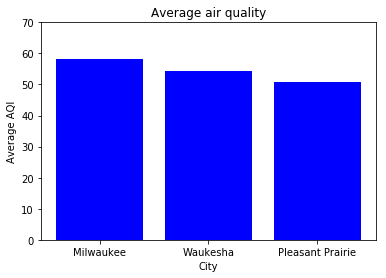

In [90]:
import matplotlib.pyplot as plt
import numpy as np
data = ([('Milwaukee', 58.068182), ('Waukesha', 54.279070), ('Pleasant Prairie', 50.731707)])

plt.title("Average air quality")
plt.xlabel('City')
plt.ylabel("Average AQI")
x = np.array([0, 1, 2])
my_xticks = ['Milwaukee', 'Waukesha', 'Pleasant Prairie']
plt.xticks(x, my_xticks)
plt.ylim(0, 70)
index = np.arange(len(data))
city_name = [x[0] for x in data]
vals = [x[1] for x in data]
result = plt.bar(index, vals,
                color = 'b')
plt.show()

Althought there are only three data plotted on the graph for the average air quality in 1997 but from this graph, you can see that the average air quality decrease as we go south. From the second data chart, we can see that most of the AQI reports where from southeast part of wisconsin, and as indicated in the third chart also that the avgerage longitude from the database is around -87 to -88, where as the average latitude is around 42 to 43, which confirm the fact that most of the data from this database is from the southeast part of wisconsin during 1997